In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
dataset = pd.read_csv(r'C:\Users\sahithi aharam\Downloads\archive (15)\parkinsons.data', sep=',', index_col='name')
dataset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


In [3]:
dataset.shape

(195, 23)

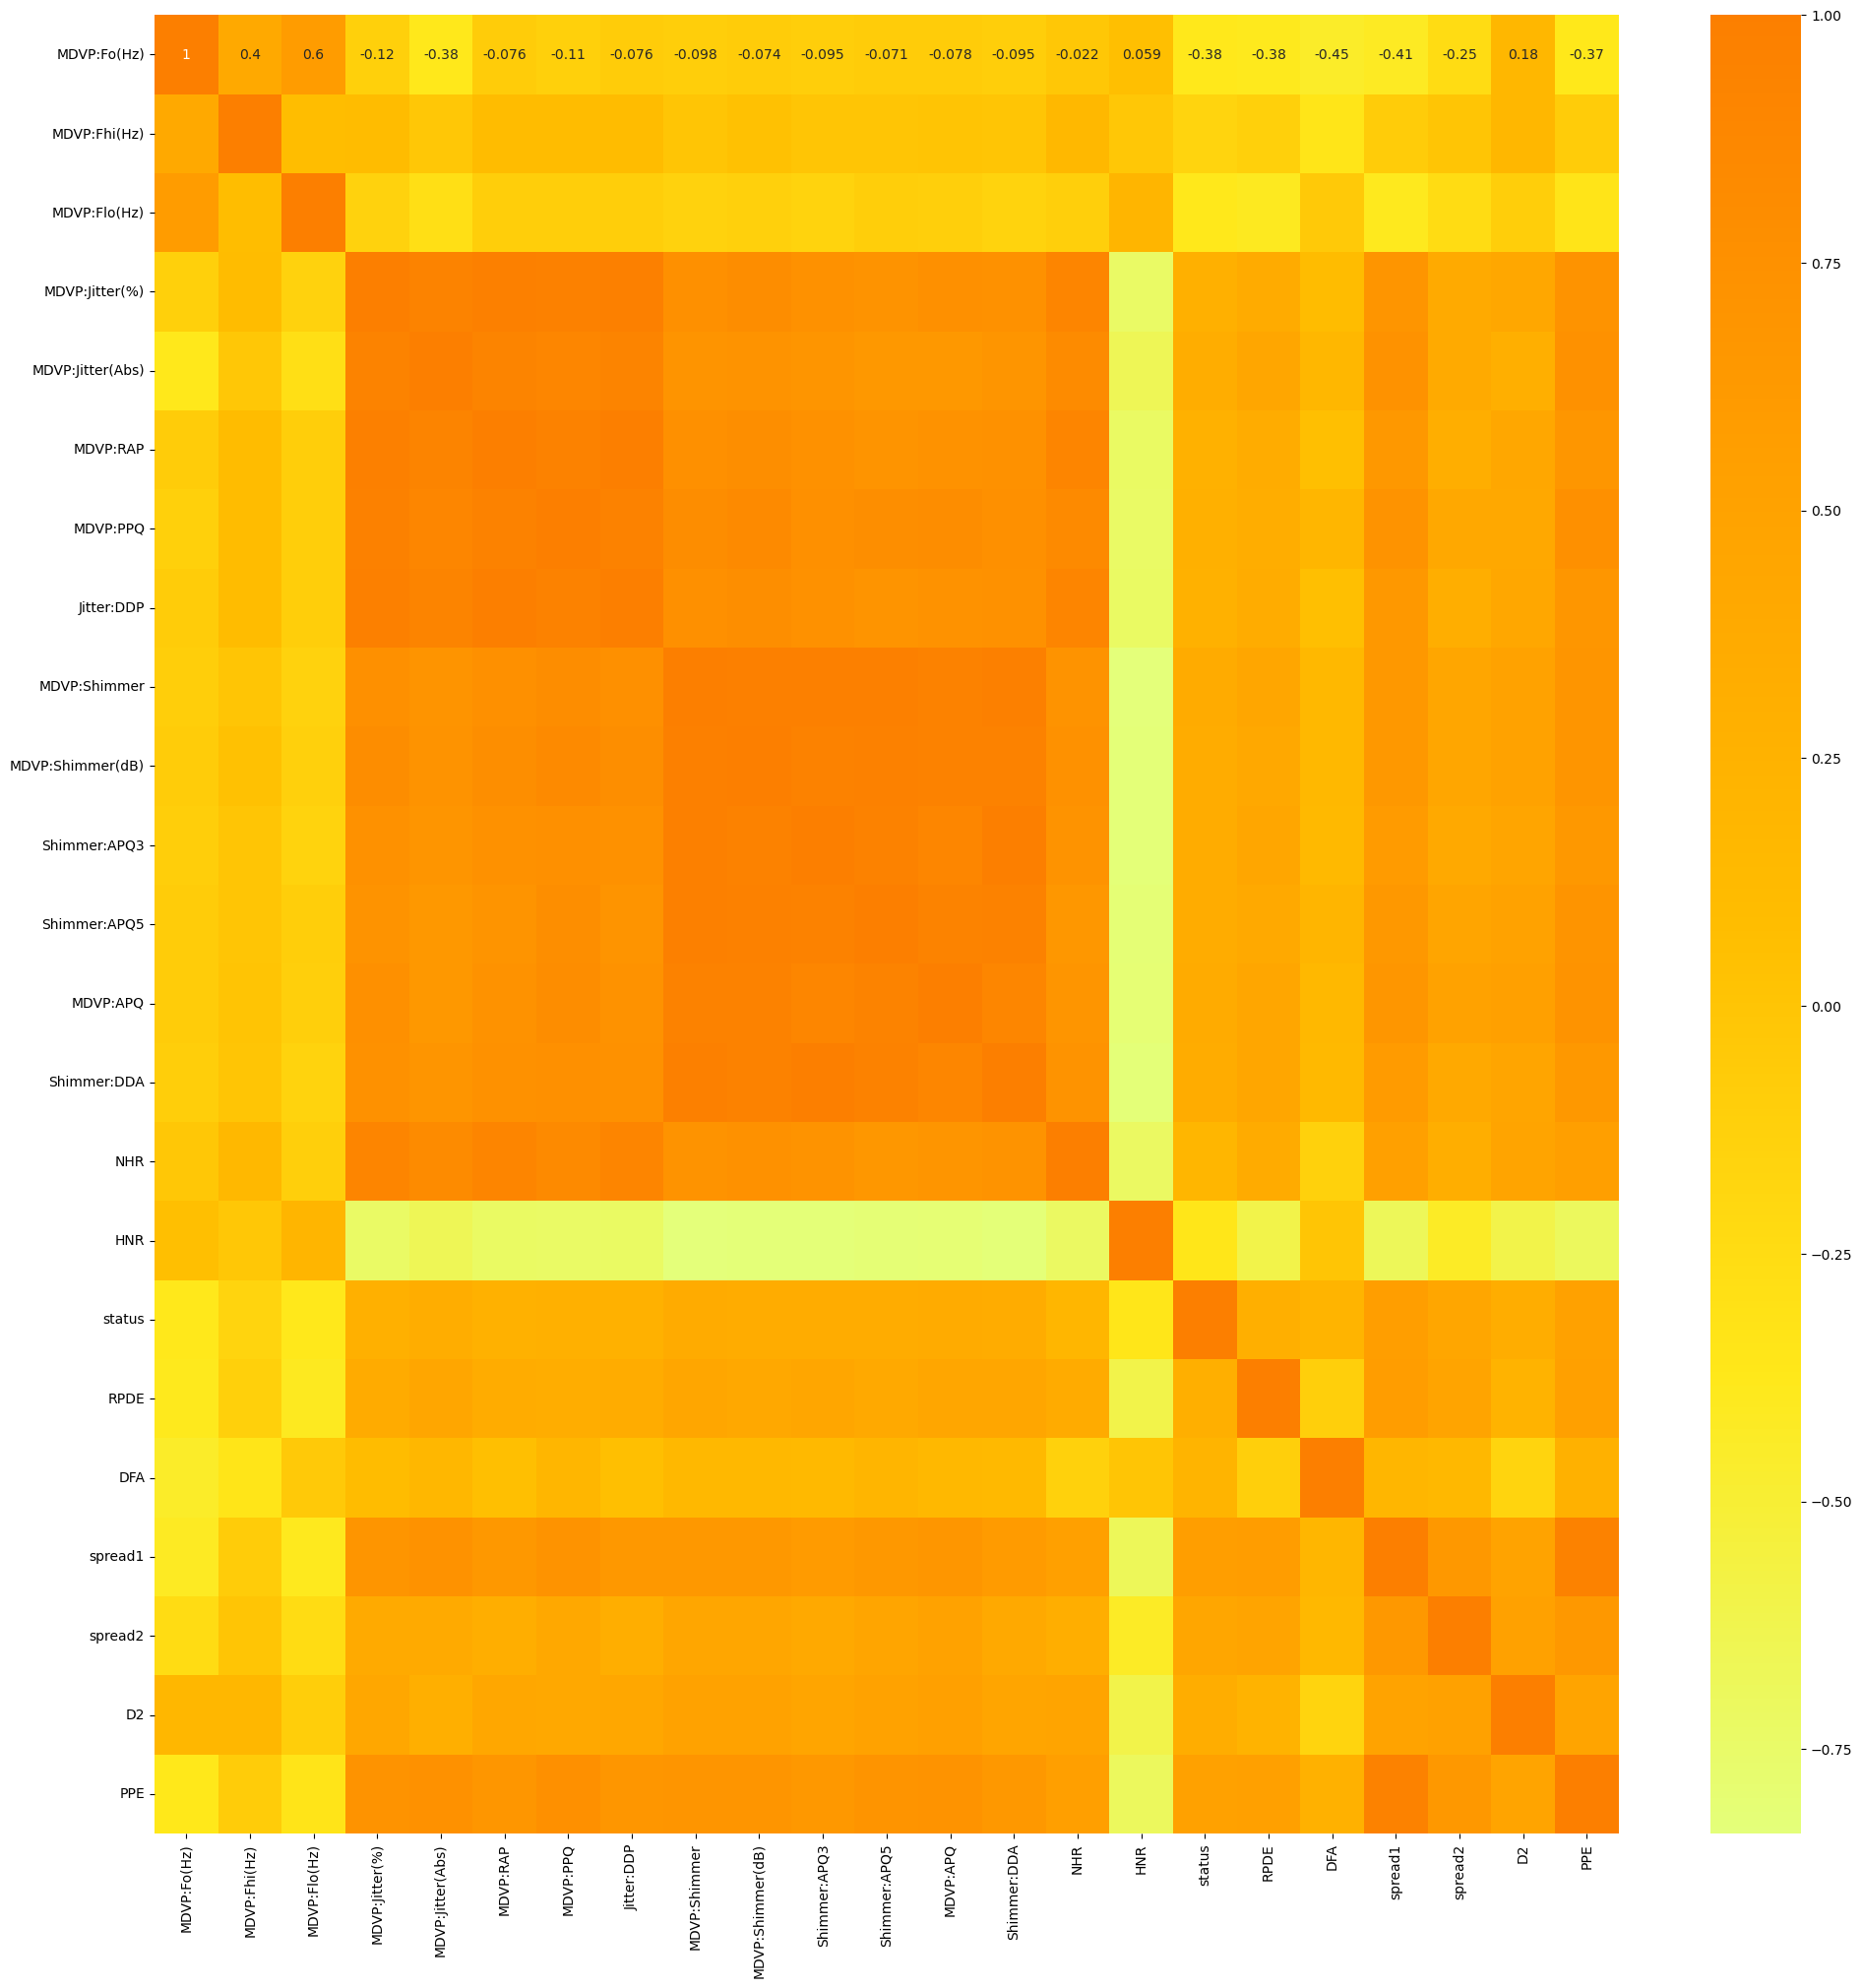

In [4]:
corr = dataset.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(corr, annot=True, cmap='Wistia')
plt.show()

In [5]:
x = dataset.iloc[:, np.r_[0:16, 17:23]].values
y = dataset.iloc[:, 16].values

In [6]:
x

array([[1.199920e+02, 1.573020e+02, 7.499700e+01, ..., 2.664820e-01,
        2.301442e+00, 2.846540e-01],
       [1.224000e+02, 1.486500e+02, 1.138190e+02, ..., 3.355900e-01,
        2.486855e+00, 3.686740e-01],
       [1.166820e+02, 1.311110e+02, 1.115550e+02, ..., 3.111730e-01,
        2.342259e+00, 3.326340e-01],
       ...,
       [1.746880e+02, 2.400050e+02, 7.428700e+01, ..., 1.584530e-01,
        2.679772e+00, 1.317280e-01],
       [1.987640e+02, 3.969610e+02, 7.490400e+01, ..., 2.074540e-01,
        2.138608e+00, 1.233060e-01],
       [2.142890e+02, 2.602770e+02, 7.797300e+01, ..., 1.906670e-01,
        2.555477e+00, 1.485690e-01]])

In [7]:
# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [12]:
import numpy as np
import warnings
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

# Ignore all warnings
warnings.filterwarnings("ignore")

# Firefly Algorithm function
def firefly_algorithm(objective_function, lb, ub, dataset, y, X, n=20, max_iter=500, alpha=0.5, beta=0.2, gamma=1.0):
    dim = len(lb)
    fireflies = np.random.rand(n, dim) * (np.array(ub) - np.array(lb)) + np.array(lb)
    fireflies = np.floor(fireflies).astype(int)  # Ensure indices are integers
    intensities = np.array([objective_function(firefly, dataset, y, X) for firefly in fireflies])

    for t in range(max_iter):
        for i in range(n):
            for j in range(n):
                if intensities[i] > intensities[j]:  # Brighter fireflies attract dimmer ones
                    r = np.linalg.norm(fireflies[i] - fireflies[j])
                    beta_t = beta * np.exp(-gamma * r ** 2)
                    fireflies[i] = fireflies[i] + beta_t * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(dim) - 0.5)
                    fireflies[i] = np.clip(fireflies[i], lb, ub)
                    fireflies[i] = np.floor(fireflies[i]).astype(int)  # Ensure indices remain integers
                    intensities[i] = objective_function(fireflies[i], dataset, y, X)

    best_index = np.argmax(intensities)
    return fireflies[best_index], intensities[best_index]

# Define the hybrid fitness function (accuracy and number of features)
def objective_function(params, dataset, y, X, test_size=0.2, weight_accuracy=0.7, weight_features=0.3):
    num_features = len(dataset.columns)
    feature_indices = np.floor(params[:num_features]).astype(int)  # Selected feature indices
    feature_indices = np.clip(feature_indices, 0, num_features - 1)  # Ensure indices are valid
    selected_features = [dataset.columns[idx] for idx in feature_indices]

    # Select the features from the dataset
    X_selected = X[:, feature_indices]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=test_size, random_state=42)

    # Train a classifier (SVM used here)
    classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf', random_state=42), n_estimators=10, random_state=42)
    classifier.fit(X_train, y_train)

    # Predict and compute accuracy
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the fitness: Maximize accuracy and minimize number of features
    num_selected_features = len(selected_features)
    max_features = num_features
    fitness = (weight_accuracy * accuracy) - (weight_features * (num_selected_features / max_features))

    return fitness

num_features = len(dataset.columns)
lb = [0] * num_features  # Lower bounds for feature indices
ub = [num_features - 1] * num_features  # Upper bounds for feature indices

opt_params, opt_value = firefly_algorithm(objective_function, lb, ub, dataset, y, X)

# Extract optimal features based on the optimized parameters
optimal_feature_indices = np.floor(opt_params[:num_features]).astype(int)
optimal_feature_names = [dataset.columns[idx] for idx in optimal_feature_indices]

print("Optimal Features Selected:")
for feature in optimal_feature_names:
    print(f"Feature: {feature}")

print(f"Optimal Fitness Value: {opt_value}")


Optimal Features Selected:
Feature: MDVP:Fo(Hz)
Feature: MDVP:Fo(Hz)
Feature: MDVP:Fo(Hz)
Feature: MDVP:Fo(Hz)
Feature: MDVP:Shimmer(dB)
Feature: Jitter:DDP
Feature: MDVP:Fo(Hz)
Feature: MDVP:Fo(Hz)
Feature: MDVP:Fo(Hz)
Feature: MDVP:Fo(Hz)
Feature: MDVP:Fo(Hz)
Feature: MDVP:Jitter(Abs)
Feature: Jitter:DDP
Feature: MDVP:Fo(Hz)
Feature: MDVP:Fhi(Hz)
Feature: MDVP:Fo(Hz)
Feature: MDVP:Fo(Hz)
Feature: MDVP:Fo(Hz)
Feature: MDVP:Fo(Hz)
Feature: MDVP:Fo(Hz)
Feature: MDVP:Fo(Hz)
Feature: MDVP:Fo(Hz)
Feature: MDVP:Fo(Hz)
Optimal Fitness Value: 0.22051282051282056


In [13]:
optimal_feature_names

['MDVP:Fo(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Shimmer(dB)',
 'Jitter:DDP',
 'MDVP:Fo(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Jitter(Abs)',
 'Jitter:DDP',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Fo(Hz)',
 'MDVP:Fo(Hz)']

In [15]:
optimal_feature = [feature for feature in optimal_feature_names]
X_fire = dataset[optimal_feature].values 
y_fire = dataset['status'].values 

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X_fire)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_fire, test_size=0.2, random_state=42)

Training Accuracy (Bagged SVM): 0.7371794871794872
Testing Accuracy (Bagged SVM): 0.8205128205128205
Training Accuracy (Bagged KNN): 0.8910256410256411
Testing Accuracy (Bagged KNN): 0.7948717948717948
Training Accuracy (Bagged Decision Tree): 0.9358974358974359
Testing Accuracy (Bagged Decision Tree): 0.8461538461538461


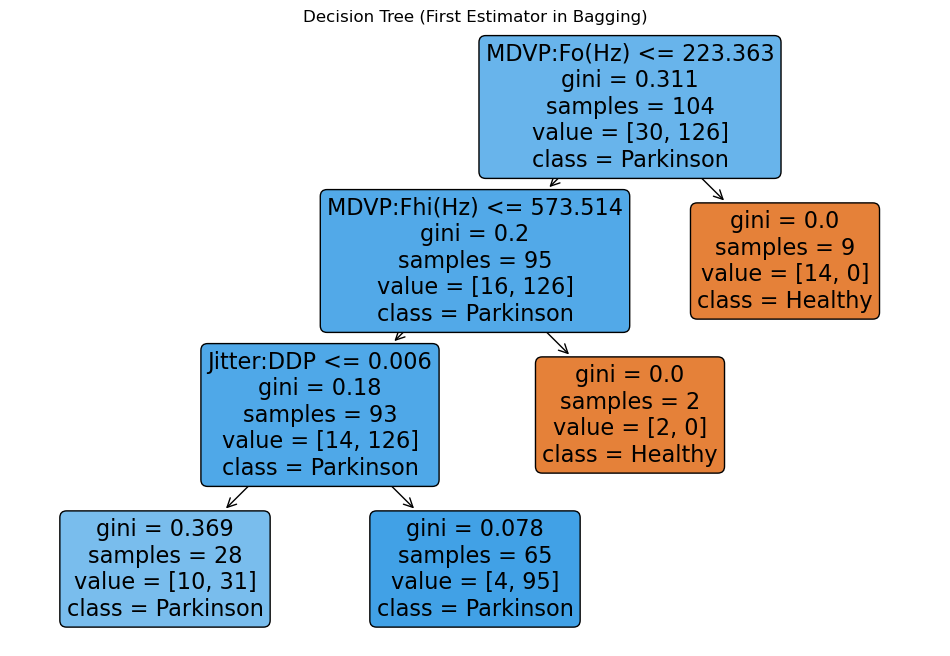

Training Accuracy (Bagged SGD Classifier): 0.7371794871794872
Testing Accuracy (Bagged SGD Classifier): 0.8205128205128205
Training Accuracy (Bagged MLP Classifier): 0.782051282051282
Testing Accuracy (Bagged MLP Classifier): 0.8717948717948718


In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Assuming the Firefly Algorithm has been executed and optimal features are selected as `X_fire` and target as `y_fire`

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_fire, X_test_fire, y_train_fire, y_test_fire = train_test_split(X_fire, y_fire, test_size=0.2, random_state=42)

# SVM with Bagging
svm_model = BaggingClassifier(base_estimator=SVC(C=0.1, kernel='rbf', gamma=0.1, random_state=42), n_estimators=10, random_state=42)
svm_model.fit(X_train_fire, y_train_fire)
y_train_pred_svc = svm_model.predict(X_train_fire)
y_test_pred_svc = svm_model.predict(X_test_fire)
train_accuracy_svc = accuracy_score(y_train_fire, y_train_pred_svc)
test_accuracy_svc = accuracy_score(y_test_fire, y_test_pred_svc)
print(f"Training Accuracy (Bagged SVM): {train_accuracy_svc}")
print(f"Testing Accuracy (Bagged SVM): {test_accuracy_svc}")

# KNN with Bagging
knn_model = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=42)
knn_model.fit(X_train_fire, y_train_fire)
y_train_pred_knn = knn_model.predict(X_train_fire)
y_test_pred_knn = knn_model.predict(X_test_fire)
train_accuracy_knn = accuracy_score(y_train_fire, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test_fire, y_test_pred_knn)
print(f"Training Accuracy (Bagged KNN): {train_accuracy_knn}")
print(f"Testing Accuracy (Bagged KNN): {test_accuracy_knn}")

# Decision Tree with Bagging
dt_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3, random_state=42), n_estimators=10, random_state=42)
dt_classifier.fit(X_train_fire, y_train_fire)
y_train_pred_dt = dt_classifier.predict(X_train_fire)
y_test_pred_dt = dt_classifier.predict(X_test_fire)
train_accuracy_dt = accuracy_score(y_train_fire, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test_fire, y_test_pred_dt)
print(f"Training Accuracy (Bagged Decision Tree): {train_accuracy_dt}")
print(f"Testing Accuracy (Bagged Decision Tree): {test_accuracy_dt}")

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier.estimators_[0], feature_names=optimal_feature_names, class_names=['Healthy', 'Parkinson'], filled=True, rounded=True)
plt.title("Decision Tree (First Estimator in Bagging)")
plt.show()

# SGD Classifier with Bagging
sgd_classifier = BaggingClassifier(base_estimator=SGDClassifier(random_state=42), n_estimators=10, random_state=42)
sgd_classifier.fit(X_train_fire, y_train_fire)
y_train_pred_sgd = sgd_classifier.predict(X_train_fire)
y_test_pred_sgd = sgd_classifier.predict(X_test_fire)
train_accuracy_sgd = accuracy_score(y_train_fire, y_train_pred_sgd)
test_accuracy_sgd = accuracy_score(y_test_fire, y_test_pred_sgd)
print(f"Training Accuracy (Bagged SGD Classifier): {train_accuracy_sgd}")
print(f"Testing Accuracy (Bagged SGD Classifier): {test_accuracy_sgd}")

# MLP Classifier with Bagging
mlp_model = BaggingClassifier(base_estimator=MLPClassifier(batch_size=128, max_iter=1000, random_state=42), n_estimators=10, random_state=42)
mlp_model.fit(X_train_fire, y_train_fire)
y_train_pred_mlp = mlp_model.predict(X_train_fire)
y_test_pred_mlp = mlp_model.predict(X_test_fire)
train_accuracy_mlp = accuracy_score(y_train_fire, y_train_pred_mlp)
test_accuracy_mlp = accuracy_score(y_test_fire, y_test_pred_mlp)
print(f"Training Accuracy (Bagged MLP Classifier): {train_accuracy_mlp}")
print(f"Testing Accuracy (Bagged MLP Classifier): {test_accuracy_mlp}")

In [22]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Assuming `X_train`, `X_test`, `y_train`, and `y_test` are already defined

# Create bagged classifiers
bagged_svm = BaggingClassifier(base_estimator=SVC(C=0.1, kernel='rbf', gamma=0.1, random_state=42), n_estimators=10, random_state=42)
bagged_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=42)
bagged_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3, random_state=42), n_estimators=10, random_state=42)
bagged_sgd = BaggingClassifier(base_estimator=SGDClassifier(random_state=42), n_estimators=10, random_state=42)
bagged_mlp = BaggingClassifier(base_estimator=MLPClassifier(batch_size=128, max_iter=1000, random_state=42), n_estimators=10, random_state=42)

# Create a Voting Classifier with the bagged classifiers
voting_clf = VotingClassifier(estimators=[
    ('bagged_svm', bagged_svm),
    ('bagged_knn', bagged_knn),
    ('bagged_dt', bagged_dt),
    ('bagged_sgd', bagged_sgd),
    ('bagged_mlp', bagged_mlp)
], voting='hard')  # 'hard' for majority voting, 'soft' for averaging probabilities

# Fit the Voting Classifier on the training data
voting_clf.fit(X_train, y_train)

# Predict on the training data
y_train_pred_voting = voting_clf.predict(X_train)

# Calculate training accuracy
train_accuracy_voting = accuracy_score(y_train, y_train_pred_voting)
print(f"Training Accuracy (Voting Classifier): {train_accuracy_voting}")

# Predict on the test data
y_test_pred_voting = voting_clf.predict(X_test)

# Calculate testing accuracy
test_accuracy_voting = accuracy_score(y_test, y_test_pred_voting)
print(f"Testing Accuracy (Voting Classifier): {test_accuracy_voting}")

Training Accuracy (Voting Classifier): 0.9487179487179487
Testing Accuracy (Voting Classifier): 0.8205128205128205


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Training set predictions
y_train_pred_voting = voting_clf.predict(X_train)

# Testing set predictions
y_test_pred_voting = voting_clf.predict(X_test)

# Training Accuracy
train_accuracy_voting = accuracy_score(y_train, y_train_pred_voting)
print(f"Training Accuracy (Voting Classifier): {train_accuracy_voting}")

# Testing Accuracy
test_accuracy_voting = accuracy_score(y_test, y_test_pred_voting)
print(f"Testing Accuracy (Voting Classifier): {test_accuracy_voting}")

# Training Precision, Recall, F1-Score
train_precision_voting = precision_score(y_train, y_train_pred_voting, average='weighted')
train_recall_voting = recall_score(y_train, y_train_pred_voting, average='weighted')
train_f1_voting = f1_score(y_train, y_train_pred_voting, average='weighted')

print(f"Training Precision (Voting Classifier): {train_precision_voting}")
print(f"Training Recall (Voting Classifier): {train_recall_voting}")
print(f"Training F1-Score (Voting Classifier): {train_f1_voting}")

# Testing Precision, Recall, F1-Score
test_precision_voting = precision_score(y_test, y_test_pred_voting, average='weighted')
test_recall_voting = recall_score(y_test, y_test_pred_voting, average='weighted')
test_f1_voting = f1_score(y_test, y_test_pred_voting, average='weighted')

print(f"Testing Precision (Voting Classifier): {test_precision_voting}")
print(f"Testing Recall (Voting Classifier): {test_recall_voting}")
print(f"Testing F1-Score (Voting Classifier): {test_f1_voting}")

# Confusion Matrix for Training and Testing Data
train_conf_matrix = confusion_matrix(y_train, y_train_pred_voting)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_voting)

print("Training Confusion Matrix:")
print(train_conf_matrix)

print("Testing Confusion Matrix:")
print(test_conf_matrix)

# Detailed Classification Report for Training and Testing Data
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred_voting, target_names=['Healthy', 'Parkinson']))

print("Classification Report for Testing Data:")
print(classification_report(y_test, y_test_pred_voting, target_names=['Healthy', 'Parkinson']))

Training Accuracy (Voting Classifier): 0.9487179487179487
Testing Accuracy (Voting Classifier): 0.8205128205128205
Training Precision (Voting Classifier): 0.9482796405873329
Training Recall (Voting Classifier): 0.9487179487179487
Training F1-Score (Voting Classifier): 0.9482979664014147
Testing Precision (Voting Classifier): 0.8108003108003108
Testing Recall (Voting Classifier): 0.8205128205128205
Testing F1-Score (Voting Classifier): 0.8149901380670611
Training Confusion Matrix:
[[ 36   5]
 [  3 112]]
Testing Confusion Matrix:
[[ 3  4]
 [ 3 29]]
Classification Report for Training Data:
              precision    recall  f1-score   support

     Healthy       0.92      0.88      0.90        41
   Parkinson       0.96      0.97      0.97       115

    accuracy                           0.95       156
   macro avg       0.94      0.93      0.93       156
weighted avg       0.95      0.95      0.95       156

Classification Report for Testing Data:
              precision    recall  f1-s